In [1]:
# Система тестига стратегий по набору параметров
#  V2
#  - удобный генератор параметров
#  - мультикотировочность
#  
#  V3 
#  - при мультикотировочности, анализируем исходя из относительной волатильности каждого актива.

import pandas_datareader as pdr
import datetime 
import time
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook   # Это для красивого прогресс бара
from itertools import *          # Это для сочетаний групп стратегий,, для расчета обще корреляции
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from my_module import *
# from my_module_anal import *

In [2]:
# 0.
# Считаем котировки

# Считаем котировки Si
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/SPFB.Si_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/1m_SPFB.Si_180501_200507.csv', sep=';')) # Большие суперданные 2019-2020
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/1m_SPFB.Si_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/1m_SPFB.Si_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/SPFB.Si_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021
curr_m5 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/SPFB.Si_210501_220501.csv', sep=';')) # Большие суперданные 2021-2022

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m5, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
Si = xuy

# Считаем котировки RTS
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/SPFB.RTS_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/1m_SPFB.RTS_190501_200501.csv', sep=',')) # Большие суперданные 2019-2020
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/1m_SPFB.RTS_180501_190501.csv', sep=',')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/1m_SPFB.RTS_170501_180501.csv', sep=',')) # Большие суперданные 2017-2018
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/SPFB.RTS_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021
curr_m5 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m/SPFB.RTS_210501_220501.csv', sep=';')) # Большие суперданные 2020-2021

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m5, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
RTS = xuy

# Считаем котировки SBRF
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SBRF_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SBRF_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SBRF_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SBRF_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SBRF_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021
curr_m5 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SBRF_210501_220501.csv', sep=';')) # Большие суперданные 2021-2022

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m5, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
SBRF = xuy

# Считаем котировки GAZR
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GAZR_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GAZR_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GAZR_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GAZR_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GAZR_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021
curr_m5 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GAZR_210501_220501.csv', sep=';')) # Большие суперданные 2021-2022

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m5, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
GAZR = xuy

# Считаем котировки MXI
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MXI_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MXI_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MXI_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MXI_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MXI_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021
curr_m5 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MXI_210501_220501.csv', sep=';')) # Большие суперданные 2021-2022

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m5, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
MXI = xuy

# Считаем котировки GOLD
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GOLD_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GOLD_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GOLD_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GOLD_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.GOLD_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
GOLD = xuy

# Считаем котировки Eu
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.Eu_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.Eu_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.Eu_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.Eu_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.Eu_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
Eu = xuy

# Считаем котировки MIX
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MIX_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MIX_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MIX_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MIX_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.MIX_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
MIX = xuy

# Считаем котировки ED
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.ED_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.ED_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.ED_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.ED_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.ED_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
ED = xuy


# Считаем котировки SILV
curr_m0 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SILV_160501_170501.csv', sep=';')) # Большие суперданные 2016-2017
curr_m  = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SILV_170501_180501.csv', sep=';')) # Большие суперданные 2017-2018
curr_m2 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SILV_180501_190501.csv', sep=';')) # Большие суперданные 2018-2019
curr_m3 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SILV_190501_200501.csv', sep=';')) # Большие суперданные 2019-2020
curr_m4 = to_datetime_OHLCV_finam(pd.read_csv('quotes_1m\SPFB.SILV_200501_210501.csv', sep=';')) # Большие суперданные 2020-2021

# Объдиним в одну пачку Через жопу, через xuy, ну и ладно
xuy = curr_m.merge(curr_m2, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m3, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m4, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy = xuy.merge(curr_m0, how='outer', on=['timestamp','open','high','low','close','vol'])
xuy.sort_values(by = ['timestamp'],ascending=True, inplace=True)
xuy.reset_index(inplace=True,drop=True)
SILV = xuy


In [3]:
# 1.1 Закинем считанные данные в список

# ВНИМАНИЕ ! ОПТИМИЗИРУЙ НА ТОР 5 !!! т.к. у тех котировки минутки говно раньше были 

quotes = [Si,RTS,SBRF,GAZR,MXI]  # супер топ микс    КЛАССИКА ОПТИМИЗАЦИИ
# quotes = [Si,RTS,SBRF]  # супер стайбл топ микс
# quotes = [RTS]
# quotes = [MXI]
# quotes = [Si]
# quotes = [Si,RTS]
# quotes = [Si,RTS,MIX]
# quotes = [Si,RTS,GOLD,MIX]
# quotes = [Si,RTS,GOLD,Eu,MIX]
# quotes = [Si,RTS,GOLD,Eu,MIX,ED,SBRF,SILV,GAZR,MXI]  # top classic
# quotes = [GOLD,Eu,MIX,ED,SBRF,SILV,GAZR,MXI]

# 0.2 Установим интервал временной для котировок,чтобы выровнять ну или просто задать необходимый интервал.

# start_date = '2016-05-01'
start_date = '2017-05-01'      # классика жанра 1 и 2 и 3
# start_date = '2020-05-01'
# start_date = '2020-11-01'
# start_date  = '2021-01-01'

# stop_date  ='2017-05-01'
# stop_date  = '2020-05-01'
# stop_date  = '2021-01-12'    # классика жанра 1
# stop_date  = '2021-05-01'    # классика жанра 2
stop_date  = '2022-05-01'      # классика жанра 3


for i in range(0,len(quotes)):
    quotes[i] = quotes[i].loc[(quotes[i].timestamp >= start_date) & (quotes[i].timestamp <= stop_date)]

# как-то бы обрезать данные по одинаковому  таймфрейму все
# Si   # 2017-05-02   2021-01-12 
# RTS  # 2017-05-02   2021-01-25

In [4]:
# # Убираем данные утренней сессии и вечерней, остается только с 10 часов и до 18 (18:44) 
# # Это для того чтобы настроить роботов на текущий режим т.к. из-за "спецоперации" все наебнулось и время торгов сократилось
# for j in range(0,len(quotes)):
#     quotes[j] = quotes[j].drop(quotes[j][(quotes[j].timestamp.dt.hour < 10) | (quotes[j].timestamp.dt.hour > 18 ) ].index)

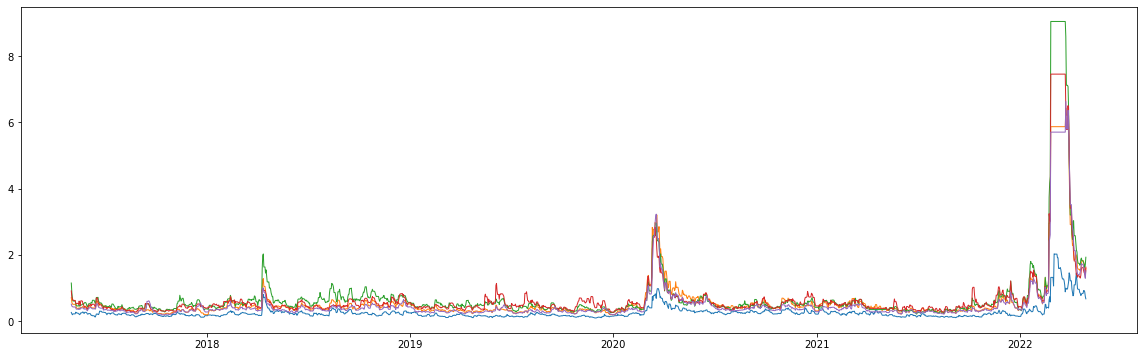

In [5]:
# Рассчитаем относительную волатильность каждого актива

# DEV
num_dev = 3000
# ema_per = 100

# ATR
num_mm      = 60    #  брать как max и min за период, например 60 мин и разницу между ними
num_atr_ema = 3000  #  и разницу между ними по EMA с каким-нибудь периодом 1000-3000

plt.rc("figure", figsize=(20, 6)) # TST

# Инициализация
vola = quotes[0][['timestamp']]
vola_D = vola.resample('1D',on='timestamp').last()
vola_D = vola_D.fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
vola_D = vola_D.fillna(0) # А все что сначала не заполнилось заливаем нулями
# грохнули не нужные столбцы
vola_D.drop(['timestamp'], axis=1, inplace=True)
vola_D.reset_index(inplace=True) #Сброс индексов и timestamp уже не будет индексом 

vola_D['v_summ'] = 0 # Создадим столбец чтобы потом не орало, если он не сформируется.
vola_D['v_mean'] = 0 # Создадим столбец чтобы потом не орало, если он не сформируется.
vola_D['inv_v_summ'] = 0
vola_D['inv_v_mean'] = 0

quotes_v = quotes.copy()  # Иначе списко не копируется ! )))  Засейвим в отдельный

for i in range(0,len(quotes)):
    # DEV   думаю хреновая идея тут делать через отклонение при тренде слишком растет отклонение и снижается доля актива 
    #       что и не отражает реальность. Лучше заменить на  ATR.
#     quotes_v[i]['dev']       = quotes_v[i]['close'].rolling(num_dev).std()
#     quotes_v[i]['dev']       = quotes_v[i]['dev'].fillna(quotes_v[i].iloc[num_dev-1].dev)
#     quotes_v[i]['volat']     = 100*quotes_v[i]['dev']/quotes_v[i]['close'] 
    
    # ATR  наверное брать как max и min за период, например 60 мин и разницу между ними по EMA с каким-нибудь периодом 1000-3000 
    quotes_v[i]['max']       = quotes_v[i]['close'].rolling(num_mm).max()
    quotes_v[i]['min']       = quotes_v[i]['close'].rolling(num_mm).min()
    quotes_v[i]['atr']       = (quotes_v[i]['max'] - quotes_v[i]['min']).ewm(span=num_atr_ema, adjust=False).mean()     
    quotes_v[i]['volat']     = 100*quotes_v[i]['atr']/quotes_v[i]['close'] 
    
    # Слишком сильно колбасит, надо бы по ЕМА проехать  ХУЙНЯ ЭТО ! надо приращения домножать а не сумму их !!! тогда не будет колбасить
#     quotes_v[i]['volat']     = quotes_v[i]['volat'].ewm(span=ema_per, adjust=False).mean()   
    quotes_v[i]['inv_volat'] = 1/quotes_v[i]['volat']
    # Ресемплим на дневки перед суммированием
    # quotes_v[i] = quotes_v[i].resample('1D',on='timestamp').last()
    quotes_v[i] = quotes_v[i].resample('1D',on='timestamp').first() # Чтобы как-то приблизить к реализму потом, типа прогноз
    quotes_v[i] = quotes_v[i].fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
    quotes_v[i] = quotes_v[i].fillna(0) # А все что сначала не заполнилось заливаем нулями
    # грохнули не нужные столбцы
    quotes_v[i].drop(['timestamp'], axis=1, inplace=True)
    quotes_v[i].reset_index(inplace=True) #Сброс индексов и timestamp уже не будет индексом 
    
    vola_D['v_summ'] += quotes_v[i]['volat']  
    vola_D['inv_v_summ'] += quotes_v[i]['inv_volat']
    plt.plot(quotes_v[i].timestamp, quotes_v[i]['volat'], linewidth=1) # TST

vola_D = vola_D.fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
vola_D = vola_D.fillna(0) # А все что сначала не заполнилось заливаем нулями
vola_D['v_mean'] = vola_D['v_summ']/len(quotes)
vola_D['inv_v_mean'] = vola_D['inv_v_summ']/len(quotes)
# vola_D['inv_v_mean'] = 1/vola_D['v_mean']

for i in range(0,len(quotes_v)):
    quotes_v[i]['mul'] = quotes_v[i]['inv_volat']/(vola_D['inv_v_mean'])
    quotes_v[i]['mul'] = quotes_v[i]['mul'].fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
    quotes_v[i]['mul'] = quotes_v[i]['mul'].fillna(0) # А все что сначала не заполнилось заливаем нулями
#     quotes_v[i]['mul'] = 1  # Отладка
#     plt.plot(quotes_v[i].timestamp, quotes_v[i]['mul'], linewidth=1) # TST

# plt.plot(quotes_v[i].timestamp, quotes_v[0]['mul']+quotes_v[1]['mul']+quotes_v[2]['mul'], linewidth=4) # TST
plt.show()    

In [6]:
quotes_v[0]

,timestamp,open,high,low,close,vol,max,min,atr,volat,inv_volat,mul
0,2017-05-02,57517.0,57585.0,57510.0,57563.0,19755.0,57601.0,57451.0,150.000000,0.260933,3.832400,2.086995
1,2017-05-03,57586.0,57688.0,57573.0,57640.0,18750.0,57733.0,57573.0,126.940649,0.220230,4.540705,2.046924
2,2017-05-04,57950.0,58054.0,57924.0,58052.0,96995.0,58052.0,57931.0,110.089561,0.189640,5.273161,2.124654
3,2017-05-05,58945.0,59399.0,58945.0,59206.0,62040.0,59206.0,58920.0,128.244003,0.216606,4.616668,1.891498
4,2017-05-06,58945.0,59399.0,58945.0,59206.0,62040.0,59206.0,58920.0,128.244003,0.216606,4.616668,1.891498
...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2022-04-25,77666.0,77666.0,76440.0,76591.0,27141.0,77656.0,76560.0,705.979229,0.921752,1.084890,1.555653
1820,2022-04-26,74910.0,74996.0,73750.0,74191.0,30012.0,75147.0,74191.0,683.519387,0.921297,1.085426,1.509736
1821,2022-04-27,74550.0,75000.0,74550.0,74621.0,13461.0,74945.0,74528.0,656.589824,0.879900,1.136493,1.473561
1822,2022-04-28,74461.0,74575.0,74045.0,74188.0,20062.0,74644.0,74188.0,552.861847,0.745217,1.341890,1.608484


In [7]:
# 2 Зададим таблицу изменяемых параметров алгоритма-системы     


# osc_tr_multy
# osc_tr_multy(curr_m, direction, stop_hour, filtration, enter_exit, candle_per,donch_per, f_macd1, f_macd2, ema2_osc,
#                 ema_macd_osc,K_ENT, K_EXT, ema_micro):  

#      param,    start, stop ,step
params = [
    
    ['filtration'  ,   3,  3,  1],  
    ['enter_exit'  ,   1,  1,  1],  

#     ['donch_per'   ,  10,  10, 10],   # micro_ema_exit  
    ['donch_per'   ,  20, 100, 10],     # donch_exit
    
    ['candle_per'  ,  40, 80,  10], 

#     ['KAMA_PER'    ,6  ,10 ,2  ],    # filtration = 3
    ['KAMA_PER'    ,4  ,5 ,1  ],    # filtration = 3
    ['TR_LVL'      ,0.1,0.4,0.1],    # filtration = 3
    
    ['shift_filtr' ,0  ,0  ,1  ],
    
    ['f_macd1'     ,  10, 10,  2], 
    ['f_macd2'     ,  20, 20,  4],
#     ['f_macd1'     ,  6 , 14,  2], 
#     ['f_macd2'     ,  16, 24,  4],

    ['K_ENT'       , 0.4,1.5,0.1],  
    
#     ['K_EXT'       , 0.0,0.8,0.1],   # micro_ema_exit
#     ['K_EXT'       ,-0.4,0.2,0.1],     # donch_exit
    ['K_EXT'       , 0.3,1.5,0.1],     # donch_exit part2    
    
#     ['K_ENT'       , 0.3,1.8,0.1],       # MACD(1.3.5)_exit    
#     ['K_EXT'       , 0.3,1.5,0.1],       # MACD(1.3.5)_exit
    
    ['stop_hour'   , 180,180,100],  
    ['direction'   ,   0,  0,  1],  
    ['ema_micro'   ,   5,  5, 10], # donch_exit
#     ['ema_micro'   ,   5, 55,  5],    # micro_ema_exit
         ]

# #  Параметры опции
# filtration = 3   # 0 - Фильтрация при нуле отключена
#                  # 1 - "1" - Запрет на покупку когда  MACD < 0 и при этом снижается, для продажи наоборот
#                  # 2 - "1" - Разрешение на покупку когда  MACD растет для продажи наоборот    !!! Этот лучше вроде ! 
#                  # 3 - "1" - Разрешение на покупку когда  KAMA_ER > TR_LVL 
        
# enter_exit = 1   # 0  - Входы и выходы при нуле только тупо по MACD 1.3.5, если фильтр включен, то и по фильтру
#                  # 1  - провожаем выход по дончиану
#                  # 2  - провожаем выход по EMA H|L
#                  # 3  - шпилим по фильтру(фильтр = 2 по MACD) ! до конца тренда держим и вход выход по MACD 1.3.5
#                  # 21 - вход встречаем по ЕМА H|L выход провожаем  по дончиану (не готово)


# # osc_macd1
# # osc_macd1(curr_m, direction, candle_per, f_macd1, f_macd2, ema2_osc,ema_macd_osc, K_ENT, K_EXT, ema_micro):   

# #      param,    start, stop ,step
# params = [
    

#     ['candle_per'  ,  40, 70,10], 
#     ['f_macd1'     ,  8 , 14, 2], 
#     ['f_macd2'     ,  16, 28, 4],

#     ['K_ENT'       , 0.3,1.3,0.1],  # 
#     ['K_EXT'       , 0.3,1.1,0.1],  # 
#     ['direction'   ,  -1,  1,  1],
# #     ['ema_micro'   , 1  ,  1,  1],
    
#          ]

# # osc_macd
# # osc_macd(curr_m, direction, candle_per, ema2_osc,ema_macd_osc, K_ENT, K_EXT, ema_micro): 

# #      param,    start, stop ,step
# params = [
    

#     ['candle_per'  ,  40,200, 10], 
#     ['K_ENT'       , 0.5,1.7,0.1],  # 
#     ['K_EXT'       , 0.3,1.3,0.1],  # 
#     ['direction'   ,  -1,  1,  1],
# #     ['ema_micro'   , 1  ,  1,  1],
    
#          ]

# # don_macd
# # don_macd(curr_m, direction, donch_per, k_macd_per,ema2_osc,ema_macd_osc, K_ENT, K_EXT, F_EXT, ema_micro):   

# #      param,    start, stop ,step
# params = [
    
#     ['direction'   ,   0,  0,  1],
#     ['donch_per'   ,  60,200, 20], 
#     ['k_macd_per'  , 0.3,0.8,0.1],  # 
#     ['K_ENT'       , 0.5,1.5,0.1],  # 
#     ['K_EXT'       , 0.3,1.5,0.1],  # 
#     ['F_EXT'       , 0.0,0.9,0.3],  # 
#     ['ema_micro'   , 1  ,  1,  1],
    
#          ]

# # donch_tr3
# # donch_tr3(curr_m, direction, donch_per, k_dev_per): 

# #      param,    start, stop ,step
# params = [
    
#     ['direction'   ,  -1,  1,  1],
#     ['donch_per'   ,  50,600, 10], 
#     ['k_dev_per'   , 0.1,4.0,0.2],  # 2-3 гуд   
#          ]


# # donch_tr2
# # donch_tr2(curr_m, direction, donch_per, k_donch1, k_donch2, EMA2_Osc): 

# #      param,    start, stop ,step
# params = [
    
#     ['direction'   ,  -1,  1,  1],
#     ['donch_per'   ,  60,600, 20], 
#     ['k_donch1'    , 0.3,1.0,0.1],  # 0.7 н
#     ['k_donch2'    , 0.1,1.0,0.1],  # 0.3
# #     ['T_EXT'       ,0.3,0.9,0.3],  # Нахер он нужен ? Просто брать тупо значение из F_EXT
# #     ['ema_micro'   ,2  ,  6,  2],
    
#          ]

# # donch_tr
# # def donch_tr(curr_m, direction, donch_per, k_macd_per, EMA2_Osc, EMA_MACD_Osc, T_ENT, ema_micro): 

# #      param,    start, stop ,step
# params = [
    
#     ['direction'   ,  -1,  1,  1],
#     ['donch_per'   ,  60,600, 20], 
#     ['k_macd_per'  , 0.1,0.8,0.1],  # 0.6 надо поднять 0,7-0,8
#     ['T_ENT'       ,-0.3,0.7,0.1],  # на 1.3 только продажа вылетает.(на 1.2 и на 1.0 тоже) Нету сделок
# #     ['T_EXT'       ,0.3,0.9,0.3],  # Нахер он нужен ? Просто брать тупо значение из F_EXT
# #     ['ema_micro'   ,2  ,  6,  2],
    
#          ]




# # e_kama_sm6
# #data, tst = e_kama_sm6(curr_m, candle_per, Shift_Filtr, KAMA_PER, TR_LVL,TR_STOP, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT,ema_micro)
# #      param,    start, stop ,step
# params = [
# #     ['Shift_Filtr' ,0  ,1  ,1  ],
#     ['Shift_Filtr' ,0  ,0  ,1  ],
#     ['KAMA_PER'    ,6  ,10 ,2  ],
#     ['TR_LVL'      ,0.1,0.4,0.1],
#     ['TR_STOP'     ,-0.2,0.2,0.1],
# #     ['EMA2_Osc'    ,3  ,3  ,1  ],
# #     ['EMA_MACD_Osc',5  ,5  ,1  ],
#     ['T_ENT'       ,0.6,1.5,0.1],  # ,0.7,2.4,0.1
# #     ['T_EXT'       ,0.3,0.9,0.3],  # Нахер он нужен ? Просто брать тупо значение из F_EXT
#     ['F_ENT'       ,100,100,0.1],
#     ['F_EXT'       ,0.3,1.5,0.1],   # ,0.3,1.5,0.1
#     ['ema_micro'   ,2  ,  6,  2],
    
#          ]

# # e_kama_sm4 Отличается от e_kama_sm2 тем, что добавляем выход по падению тренда до определенного уровня KAMA_ER по TR_STOP
# #      param,    start, stop ,step
# params = [
#     ['Shift_Filtr' ,0  ,1  ,1  ],
# #     ['Shift_Filtr' ,0  ,0  ,1  ],
#     ['KAMA_PER'    ,7  ,10 ,1  ],
#     ['TR_LVL'      ,0.3,0.7,0.1],
#     ['TR_STOP'     ,-0.5,0.2,0.1],
# #     ['EMA1_Osc'    ,1  ,1  ,1  ],
# #     ['EMA2_Osc'    ,3  ,3  ,1  ],
# #     ['EMA_MACD_Osc',5  ,5  ,1  ],
#     ['T_ENT'       ,0.6,1.5,0.1],  # ,0.7,2.4,0.1
# #     ['T_EXT'       ,0.3,0.9,0.3],  # Нахер он нужен ? Просто брать тупо значение из F_EXT
#     ['F_ENT'       ,100,100,0.1],
#     ['F_EXT'       ,0.3,1.5,0.1],   # ,0.3,1.5,0.1
#          ]


# e_kama_sm3 это тоже что и e_kama_sm2, только вместо DEV используется ATR
# e_kama_sm2 улучшенный по скорости аналог ! elder_ema_kama_profit_SM_TST 
#      param,    start, stop ,step
# params = [
#     ['Shift_Filtr' ,0  ,1  ,1  ],
# #     ['Shift_Filtr' ,0  ,0  ,1  ],
#     ['KAMA_PER'    ,7  ,10 ,1  ],
#     ['TR_LVL'      ,0.3,0.7,0.1],
# #     ['EMA1_Osc'    ,1  ,1  ,1  ],
# #     ['EMA2_Osc'    ,3  ,3  ,1  ],
# #     ['EMA_MACD_Osc',5  ,5  ,1  ],
#     ['T_ENT'       ,1.7,2.4,0.1],  # ,0.7,2.4,0.1
# #     ['T_EXT'       ,0.3,0.9,0.3],  # Нахер он нужен ? Просто брать тупо значение из F_EXT
#     ['F_ENT'       ,100,100,0.1],
#     ['F_EXT'       ,1.3,1.5,0.1],   # ,0.3,1.5,0.1
#          ]

# # elder_ema_kama_profit_SM_TST
# #      param,    start, stop ,step
# params = [
#     ['Shift_Filtr' ,0  ,2  ,1  ],
#     ['KAMA_PER'    ,6  ,10 ,1  ],
#     ['TR_LVL'      ,0.3,0.7,0.1],
# #     ['EMA1_Osc'    ,1  ,1  ,1  ],
# #     ['EMA2_Osc'    ,3  ,3  ,1  ],
# #     ['EMA_MACD_Osc',5  ,5  ,1  ],
#     ['T_ENT'       ,0.7,2.4,0.1],
# #     ['T_EXT'       ,0.3,0.9,0.3],  # Нахер он нужен ? Просто брать тупо значение из F_EXT
#     ['F_ENT'       ,100,100,0.1],
#     ['F_EXT'       ,0.3,1.5,0.1],   
#          ]

# # kama_trend 
# # kama_trend(curr_m, d_shift, d_candle_per, d_kama_per,d_kama_min, d_kama_max, d_atr_per, d_k_atr)
# #      param,    start, stop ,step
# params = [
#     ['d_candle_per',100 ,1200,10  ],
#     ['d_kama_per'  ,6   ,20  ,1   ],
#     ['d_k_atr'     ,0.05,0.15,0.01], 
#          ]

# # kama_tr_macd_osc
# # kama_tr_macd_osc(curr_m, shift, candle_per, kama_per,kama_min, kama_max, atr_per, k_atr,EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, ENT)
# #      param,    start, stop ,step
# params = [
# #     ['candle_per',40  ,120 ,10  ],
#     ['candle_per',40  ,60 ,10  ],  # 1 заход
#     ['kama_per'  ,6   ,20  ,1   ],
#     ['k_atr'     ,0.05,0.15,0.01], 
#     ['ENT'       ,0.1 ,1.5 ,0.1 ], 
#          ]
# -------------------------------------------- elder_macd_ema ----------------------------------
# elder_macd_ema
# elder_macd_ema(curr_m, shift_1, candle_per_1, shift_2, candle_per_2,EMA1_per, EMA2_per, EMA_MACD_per, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, ENT_m, EXT_m)

# #      param,    start, stop ,step
# params = [
# #     ['candle_per_1',0  ,2  ,1  ],
# #     ['shift_1'     ,6  ,10 ,1  ],
# #     ['TR_LVL'      ,0.3,0.7,0.1],
# #     ['EMA1_Osc'    ,1  ,1  ,1  ],
#     ['ENT_m'       ,0.0,2.5,0.1],
#     ['EXT_m'       ,0.5,5.0,0.1],   
#          ]

#  micro_enter
#      param,    start, stop ,step
# params = [
# # MAX
#     ['ema_per'     ,3 ,22  ,1  ],
#     ['donch_per'   ,3 ,25  ,3  ],
#     ['k_dohch'     ,0 ,0.7 ,0.1], 
#     ['round_price' ,0 ,0   ,1  ], 

# #  MIDD
#     ['ema_per'     ,3  ,15  ,3  ],
#     ['donch_per'   ,3  ,15  ,3  ],
#     ['k_dohch'     ,0  ,0.4 ,0.1], 
#     ['round_price' ,0  ,0   ,1  ], 
    
# #  ONE    
#     ['ema_per'     ,6  ,6   ,1  ],
#     ['donch_per'   ,3  ,3   ,1  ],
#     ['k_dohch'     ,0.2,0.2 ,0.1], 
#     ['round_price' ,0  ,0   ,1  ], 
#          ]

# #Константы
# ema_per   = 10  # 10
# donch_per = 3   # 3
# k_dohch   = 0.1 # 0.1
# round_price = 0 # 0 Si, -1 RI 

name_par, val_par = list(), list()
for par in params:
    name_par.append(par[0])
    val_par.append(frange(*par[1:]))

tbl = pd.DataFrame(product(*val_par), columns=name_par)
tbl.to_csv('tbl.csv', sep=';', index=False) # пишем
tbl.head(2)

,filtration,enter_exit,donch_per,candle_per,KAMA_PER,TR_LVL,shift_filtr,f_macd1,f_macd2,K_ENT,K_EXT,stop_hour,direction,ema_micro
0,3,1,20,40,4,0.1,0,10,20,0.4,0.3,180,0,5
1,3,1,20,40,4,0.1,0,10,20,0.4,0.4,180,0,5


In [8]:
tbl = pd.read_csv('tbl.csv', sep=';')  # читаем
tbl.tail(2)

,filtration,enter_exit,donch_per,candle_per,KAMA_PER,TR_LVL,shift_filtr,f_macd1,f_macd2,K_ENT,K_EXT,stop_hour,direction,ema_micro
56158,3,1,100,80,5,0.4,0,10,20,1.5,1.4,180,0,5
56159,3,1,100,80,5,0.4,0,10,20,1.5,1.5,180,0,5


In [ ]:
#============================================STRATEGY OPTIMIZATION========================================
# 3.1 Цикл перебора значений

# Введем исходные параметры для тестинга Период свечи и интервал сдвига

ema_micro = 6

# INIT donch_tr(2,3) e_kama_sm2(sm3,sm4,sm6) и elder_ema_kama_profit_SM_TST const ---------------------------------

candle_per = 45  # 40, 45(60) На 50 и на 40 неплохо тоже.  м.б. 70,60,50,45
shift      = 1   # ТОЛЬКО 1 минуту !!! иначе говно !!! 15 (20)
# Ещё КАМА бы с периодом 8 и можно период свечи ещё при этом 70 и 80 добавить

# Параметры осциллятора
EMA1_Osc     = 1  # 1  1
EMA2_Osc     = 3  # 5  3
EMA_MACD_Osc = 5  # 8  5


# INIT kama_trend const  ------------------------------------------------------------

# # d_candle_per = 600  # 600(гуд)  60  
# d_shift      = 10   # 10        10   должен быть кратен d_candle_per

# # d_kama_per   = 10
# d_kama_min   = 2
# d_kama_max   = 30

# d_atr_per    = 50
# # d_k_atr      = 0.1  # 0.1 

# # INIT kama_tr_macd_osc ---------------------------------------------------------------

# # d_candle_per = 600  # 600(гуд)  60  
# shift      = 10   # 10        10   должен быть кратен d_candle_per

# kama_per   = 10
# kama_min   = 2
# kama_max   = 30

# atr_per    = 50
# # d_k_atr      = 0.1  # 0.1 

# #------------------------------------  INIT elder_macd_ema ----------------------------------------------------

# ema_per = 21

# # MACD
# EMA1_per     = 12
# EMA2_per     = 26
# EMA_MACD_per = 9

# # MACD
# candle_per_1 = 300  # 300 60
# shift_1      = 10   # 10  10

# # OSC - micro TF
# candle_per_2 = 60  # 60 12 10
# shift_2      = 10   #  1 1  1

# # По логике выход должен быть с большим коэффициентом, ведь мы шпилим в направлении тренда
# ENT_f = 1.0   # 1.0  справа хуйня 1.0  1.5  1.5  1  1  5 force_lvl  на вход
# EXT_f = 5.0   # 4.0  справа хуйня 4.0  6.0  4.0  5  4  3 force_lvl  на выход

# # MACD_OSC

# EMA1_Osc     = 1
# EMA2_Osc     = 3
# EMA_MACD_Osc = 5
# #------------------------------------ INIT elder_macd_ema END----------------------------------------------

# Имя файла для хранения промежуточных расчетов и загрузки после остановки алгоритма
name_save_file = 'save_ddf.csv'

# Инициализация датафрейма с правильной временной распальцовкой индекса

# Финальный датафрейм со столбцами
ddf = quotes[0][['timestamp']].resample('1D',on='timestamp').last()
ddf.drop(['timestamp'], axis=1, inplace=True)
ddf.reset_index(inplace=True) #Сброс индексов и timestamp уже не будет индексом  
# Датафрейм со средним значением по всем котировкам
df_all_midd = ddf[['timestamp']]
# эталон  'timestamp'
df2 = ddf[['timestamp']]

ftime = time.time() #Засекаем время

# Восстанавливаем сохраненную таблицу ddf и начинаем цикл с последнего сохраненного значения.
if os.path.exists(name_save_file):
    #ddf = pd.read_csv(name_save_file, sep=';')
    ddf = pd.read_csv(name_save_file, sep=';',parse_dates=['timestamp']) # Ткуда наухй тут это ? parse_dates=['timestamp']

    # установить datetime64[ns] на 'timestamp'

# ddf.shape[1]-1 - следующий индекс для теста, при пустом ddf(timestamp) будет равно нулю, что нам и надо
start_tbl = ddf.shape[1]-1 # ddf.shape[1]-2 Число будет соответсвовать номеру строки таблицы оптимизации
print('Стартуем с итерации ',start_tbl)   

try:    
    for i in tqdm_notebook(range(start_tbl,len(tbl))): #923 на 60-10    # Отладка

    # Восстанавливаем переменные из tbl и перебираем их в цикле.    
    # for i in tqdm_notebook(range(0,len(tbl))): #923 на 60-10    Без восстановления из файла name_save_file
        # Инициализация
        num = 0
        df_all_midd = ddf[['timestamp']]
        df_all_midd['SUMM_PERC'] = 0 # Создадим столбец чтобы потом не орало, если он не сформируется.
        #---------------------------------Начало супер-цикла ! ----------------------------------
        # Цикл перебора разных котировок
        for j in range(0,len(quotes)):

            data = 0 
            #osc_tr_multy(           curr_m,            direction,             stop_hour,             filtration,             enter_exit,                                  candle_per,          donch_per,                 f_macd1,             f_macd2,    ema2_osc,  ema_macd_osc,     K_ENT,        K_EXT,    ema_micro):  
#                       osc_tr_multy(quotes[j],        direction,             stop_hour,             filtration,          shift_filtr, enter_exit,                       TR_LVL, KAMA_PER,                     candle_per, donch_per,                         f_macd1, f_macd2,                    ema2_osc, ema_macd_osc,         K_ENT, K_EXT, ema_micro)
            data, tst = osc_tr_multy(quotes[j], int(tbl.direction[i]), int(tbl.stop_hour[i]), int(tbl.filtration[i]), int(tbl.shift_filtr[i]), int(tbl.enter_exit[i]), tbl.TR_LVL[i], int(tbl.KAMA_PER[i]), int(tbl.candle_per[i]), int(tbl.donch_per[i]), int(tbl.f_macd1[i]), int(tbl.f_macd2[i]), EMA2_Osc, EMA_MACD_Osc, tbl.K_ENT[i], tbl.K_EXT[i], int(tbl.ema_micro[i])) #
            
            #data, tst = osc_macd1(quotes[j], int(tbl.direction[i]), int(tbl.candle_per[i]), int(tbl.f_macd1[i]), int(tbl.f_macd2[i]), EMA2_Osc, EMA_MACD_Osc, tbl.K_ENT[i], tbl.K_EXT[i], ema_micro) #                                        
            #data, tst = osc_macd(quotes[j], int(tbl.direction[i]), int(tbl.candle_per[i]), EMA2_Osc, EMA_MACD_Osc, tbl.K_ENT[i], tbl.K_EXT[i], ema_micro) #                
            #data, tst = don_macd(quotes[j], int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_macd_per[i], EMA2_Osc, EMA_MACD_Osc, tbl.K_ENT[i], tbl.K_EXT[i], tbl.F_EXT[i], int(tbl.ema_micro[i])) #                          
            #data, tst = donch_tr3(quotes[j], int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_dev_per[i])                                 
            #data, tst = donch_tr2(quotes[j], int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_donch1[i], tbl.k_donch2[i],EMA2_Osc)                                 
            #data, tst = donch_tr(quotes[j], int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_macd_per[i], EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], ema_micro) 
            #data, tst = e_kama_sm6(quotes[j], candle_per, int(tbl.Shift_Filtr[i]), int(tbl.KAMA_PER[i]), tbl.TR_LVL[i], tbl.TR_STOP[i], EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i], tbl.ema_micro[i]) # T_EXT = F_EXT
            #data, tst = e_kama_sm4(quotes[j], shift, candle_per, int(tbl.Shift_Filtr[i]), int(tbl.KAMA_PER[i]), tbl.TR_LVL[i], tbl.TR_STOP[i], EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i]) # T_EXT = F_EXT
            #data, tst = e_kama_sm3(quotes[j], shift, candle_per, int(tbl.Shift_Filtr[i]), int(tbl.KAMA_PER[i]), tbl.TR_LVL[i], EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i]) # T_EXT = F_EXT 
            #data, tst = e_kama_sm2(quotes[j], shift, candle_per, int(tbl.Shift_Filtr[i]), int(tbl.KAMA_PER[i]), tbl.TR_LVL[i], EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i]) # T_EXT = F_EXT 
            #data, tst = elder_macd_ema(curr_m, shift_1, candle_per_1, shift_2, candle_per_2,ema_per,EMA1_per, EMA2_per, EMA_MACD_per, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.ENT_m[i], tbl.EXT_m[i])
#             data, tst = kama_tr_macd_osc(quotes[j], shift, int(tbl.candle_per[i]), int(tbl.kama_per[i]),kama_min, kama_max, atr_per,tbl.k_atr[i],EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.ENT[i])
#             data, tst = kama_trend(quotes[j], d_shift, int(tbl.d_candle_per[i]), int(tbl.d_kama_per[i]),d_kama_min, d_kama_max, d_atr_per,tbl.d_k_atr[i])
            # Выбор стратегии для оптимизации T_EXT[i] = F_EXT[i]
#             data, tst = elder_ema_kama_profit_SM_TST(quotes[j], shift, candle_per, int(tbl.Shift_Filtr[i]), int(tbl.KAMA_PER[i]), tbl.TR_LVL[i], EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i])
        #     data, tst = elder_ema_kama_profit_SM_TST(curr_m, shift, candle_per, int(tbl.Shift_Filtr[i]), int(tbl.KAMA_PER[i]), tbl.TR_LVL[i], EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.T_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i])
        #     data, tst = elder_ema_kama_profit_SM_TST(curr_m, shift, candle_per, 0,10,0.4,1,3,5,1.6,0.7,100,1.1)
        #     data, tst = profit_SM_TST(curr_m, shift, candle_per, int(tbl.Shift_Filtr[i]), EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.T_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i])
        #     data, tst = elder_kama_profit_SM_TST(curr_m, shift, candle_per, int(tbl.Shift_Filtr[i]), int(tbl.KAMA_PER[i]), tbl.TR_LVL[i], EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, tbl.T_ENT[i], tbl.T_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i])    



            # Подготовим данные с процентом прибыли и с ресемплингом под дням

            df1 = tst[['timestamp','SUMM_PERC']]
#             df1 = tst[['timestamp','SUMM_PERC','SUMM_PERC_m']]   # micro
            
            # Если уж произошла такая хуйня что датафрейм пустой ! пропускаем нахуй эту итерацию
            if len(tst) != 0:

                df1 = df1.resample('1D',on='timestamp').last() # на 923 итерации здесь ерро хуй знает почему !!! блять по средней-то сглаживаются провалы и слишком идеально как-то все
                # грохнули не нужные столбцы
                df1.drop(['timestamp'], axis=1, inplace=True)        
                df1.reset_index(inplace=True) #Сброс индексов и timestamp уже не будет индексом 
                
                # V3.1 пиздец ! тут одни NaN надо заполнить предыдущим и т.д. Хули блять !
                df1 = df1.fillna(method='ffill')               # Заполняем дыры предыдущим действительным значением
                df1 = df1.fillna(0)                            # А все что сначала не заполнилось заливаем нулями
                
                # V3 Вначале нарежем на приращения ежедневные df1[SUMM_PERC] а потом домножим  на множитель относительной волатильности # quotes_v[j]['mul']
                df1['sum_slice'] = (df1['SUMM_PERC'] - df1['SUMM_PERC'].shift(1)).fillna(0)
                df1['sum_mul'] = (df1['sum_slice']*quotes_v[j]['mul']).cumsum() 
                df1['SUMM_PERC'] = df1['sum_mul']
                df1 = df1.loc[:, df1.columns.intersection(['timestamp','SUMM_PERC'])]  # Оставляем только один 'timestamp','SUMM_PERC'

                # reInit df2
                df2 = ddf[['timestamp']]  # ВНИМАНИЕ !!! ТУТ НАДО НАРОСТИТЬ df1 до stop_date/ start_date !!!! 
                df2 = pd.merge(df2,df1, how='outer', on='timestamp') # А как насчет того чтобы тупо по merge сливаться с эталоном и тогда  'timestamp' будет всегда четкий
                df2 = df2.fillna(method='ffill')               # Заполняем дыры предыдущим действительным значением
                df2 = df2.fillna(0)                            # А все что сначала не заполнилось заливаем нулями

                # Вычисляем сумму всего профита для вычисления среднее значение профита  потом
                df_all_midd = pd.concat([df_all_midd, df2], axis=0).groupby('timestamp').sum().reset_index() 

                # Вычисляем количество сделок 
                num += round(len(data)/2)    

        num = round(num/len(quotes))                                # Среднее количество сделок
        df_all_midd.SUMM_PERC = df_all_midd.SUMM_PERC/len(quotes)   # Среднее значение процента профита
   

           
        
        
        #osc_tr_multy(                   curr_m, direction, stop_hour, filtration, shift_filtr, enter_exit,TR_LVL, KAMA_PER, candle_per,donch_per, f_macd1, f_macd2, ema2_osc,ema_macd_osc,K_ENT, K_EXT, ema_micro):  
#         data, tst = osc_tr_multy(quotes[j], int(tbl.direction[i]), int(tbl.stop_hour[i]), int(tbl.filtration[i]),int(tbl.shift_filtr[i]), int(tbl.enter_exit[i]), tbl.TR_LVL[i], int(tbl.KAMA_PER[i]), int(tbl.candle_per[i]), int(tbl.donch_per[i]), int(tbl.f_macd1[i]), int(tbl.f_macd2[i]), EMA2_Osc, EMA_MACD_Osc, tbl.K_ENT[i], tbl.K_EXT[i], ema_micro) #

        #data, tst = osc_tr_multy(quotes[j], int(tbl.direction[i]), int(tbl.stop_hour[i]), int(tbl.filtration[i]), int(tbl.shift_filtr), int(tbl.enter_exit[i]), tbl.TR_LVL[i], int(tbl.KAMA_PER[i]), int(tbl.candle_per[i]), int(tbl.donch_per[i]), int(tbl.f_macd1[i]), int(tbl.f_macd2[i]), EMA2_Osc, EMA_MACD_Osc, tbl.K_ENT[i], tbl.K_EXT[i], int(tbl.ema_micro[i])) #
        #osc_tr_multy
        df_all_midd.rename(columns={'SUMM_PERC':'direction=%i:stop_hour=%i:filtration=%i:shift_filtr=%i:enter_exit=%i:TR_LVL=%.2f:KAMA_PER=%i:candle_per=%i:donch_per=%i:f_macd1=%i:f_macd2=%i:K_ENT=%.2f:K_EXT=%.2f:ema_micro=%i:NUM=%i' % (int(tbl.direction[i]), int(tbl.stop_hour[i]), int(tbl.filtration[i]),int(tbl.shift_filtr[i]), int(tbl.enter_exit[i]),tbl.TR_LVL[i], int(tbl.KAMA_PER[i]), int(tbl.candle_per[i]), int(tbl.donch_per[i]), int(tbl.f_macd1[i]), int(tbl.f_macd2[i]), tbl.K_ENT[i], tbl.K_EXT[i], int(tbl.ema_micro[i]),num)}, inplace=True)
                                      
        #osc_macd1        
        #df_all_midd.rename(columns={'SUMM_PERC':'direction=%i:candle_per=%i:f_macd1=%i:f_macd2=%i:K_ENT=%.1f:K_EXT=%.1f:NUM=%i' % (int(tbl.direction[i]), int(tbl.candle_per[i]),int(tbl.f_macd1[i]), int(tbl.f_macd2[i]), tbl.K_ENT[i], tbl.K_EXT[i],num)}, inplace=True)
   
        #osc_macd        
        #df_all_midd.rename(columns={'SUMM_PERC':'direction=%i:candle_per=%i:K_ENT=%.1f:K_EXT=%.1f:NUM=%i' % (int(tbl.direction[i]), int(tbl.candle_per[i]), tbl.K_ENT[i], tbl.K_EXT[i],num)}, inplace=True)
            
        #don_macd        
        #df_all_midd.rename(columns={'SUMM_PERC':'direction=%i:donch_per=%i:k_macd_per=%.1f:K_ENT=%.1f:K_EXT=%.1f:F_EXT=%.1f:ema_micro=%.1i:NUM=%i' % (int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_macd_per[i], tbl.K_ENT[i], tbl.K_EXT[i], tbl.F_EXT[i], int(tbl.ema_micro[i]),num)}, inplace=True)
        
        # donch_tr3
        #df_all_midd.rename(columns={'SUMM_PERC':'direction=%i:donch_per=%i:k_dev_per=%.1f:NUM=%i' % (int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_dev_per[i], num)}, inplace=True)          
        
        # donch_tr2
        #df_all_midd.rename(columns={'SUMM_PERC':'direction=%i:donch_per=%i:k_donch1=%.1f:k_donch2=%.1f:NUM=%i' % (int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_donch1[i], tbl.k_donch2[i], num)}, inplace=True)          
        
        # donch_tr
        #df_all_midd.rename(columns={'SUMM_PERC':'direction=%i:donch_per=%i:k_macd_per=%.1f:T_ENT=%.1f:NUM=%i' % (int(tbl.direction[i]), int(tbl.donch_per[i]), tbl.k_macd_per[i] ,tbl.T_ENT[i], num)}, inplace=True)          
        
        # e_kama_sm6 Отличается от e_kama_sm2 тем, что добавляем выход по падению тренда до определенного уровня KAMA_ER по TR_STOP и все на минутках сразу и провожаем по ема
        #df_all_midd.rename(columns={'SUMM_PERC':'KAMA_PER=%i:TR_LVL=%.1f:TR_STOP=%.1f:Shift_Filtr=%.1i:T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:ema_micro=%.1i:NUM=%i' % (int(tbl.KAMA_PER[i]), tbl.TR_LVL[i],tbl.TR_STOP[i],tbl.Shift_Filtr[i],tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i],tbl.ema_micro[i],num)}, inplace=True)          

        # e_kama_sm4 Отличается от e_kama_sm2 тем, что добавляем выход по падению тренда до определенного уровня KAMA_ER по TR_STOP
        #df_all_midd.rename(columns={'SUMM_PERC':'KAMA_PER=%i:TR_LVL=%.1f:TR_STOP=%.1f:Shift_Filtr=%.1i:T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:NUM=%i' % (int(tbl.KAMA_PER[i]), tbl.TR_LVL[i],tbl.TR_STOP[i],tbl.Shift_Filtr[i],tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i],num)}, inplace=True)          

        # e_kama_sm2  ускоренный аналог elder_ema_kama_profit_SM_TST
        #df_all_midd.rename(columns={'SUMM_PERC':'KAMA_PER=%i:TR_LVL=%.1f:Shift_Filtr=%.1f:T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:NUM=%i' % (int(tbl.KAMA_PER[i]), tbl.TR_LVL[i],tbl.Shift_Filtr[i],tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i],num)}, inplace=True)          
        
        # elder_macd_ema
#         df_all_midd.rename(columns={'SUMM_PERC':'ENT_m=%.2f:EXT_m=%.2f:NUM=%i' % (tbl.ENT_m[i], tbl.EXT_m[i],num)}, inplace=True)  
        # kama_tr_macd_osc
#         df_all_midd.rename(columns={'SUMM_PERC':'candle_per=%i:kama_per=%i:k_atr=%.2f:ENT=%.2f:NUM=%i' % (int(tbl.candle_per[i]), int(tbl.kama_per[i]),tbl.k_atr[i],tbl.ENT[i],num)}, inplace=True)  
        
        # kama_trend
#         df_all_midd.rename(columns={'SUMM_PERC':'d_candle_per=%i:d_kama_per=%i:d_k_atr=%.2f:NUM=%i' % (int(tbl.d_candle_per[i]), int(tbl.d_kama_per[i]),tbl.d_k_atr[i],num)}, inplace=True)  
        
        # elder_ema_kama_profit_SM_TST
#         df_all_midd.rename(columns={'SUMM_PERC':'KAMA_PER=%i:TR_LVL=%.1f:Shift_Filtr=%.1f:T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:NUM=%i' % (int(tbl.KAMA_PER[i]), tbl.TR_LVL[i],tbl.Shift_Filtr[i],tbl.T_ENT[i], tbl.F_EXT[i], tbl.F_ENT[i], tbl.F_EXT[i],num)}, inplace=True)  
        
        
        ddf = pd.merge(ddf,df_all_midd, how='outer', on='timestamp') 
        #ddf = pd.concat([ddf, df1])

        # Условие выгрузки по нажатию кнопки !


        #---------------------------------Конец супер-цикла ! ----------------------------------   
# Ручная остановка цикла, сохраняем ddf в файл, удаляя последний столбец, т.к он может быть не достоверным в момент останова
except KeyboardInterrupt:
    print("Сохраняем итерация ",i) 
    ddf = ddf.iloc[:,:-1]
    ddf.to_csv(name_save_file, sep=';',index=False)
    print("Сохранили ГОУ-ГОУ ! (откинули последний столбец)") 
           
    
endtime = time.time() - ftime
print("Время цикла=",endtime,"секунд или ", int(endtime/60),' минут')            
          
ddf = ddf.fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
ddf = ddf.fillna(0) # А все что сначала не заполнилось заливаем нулями 


Стартуем с итерации  22407


  0%|          | 0/33753 [00:00<?, ?it/s]

In [23]:
# Сохраним результаты перебора стратегий в файл
# filters_all = big_price_x3_fut_2017_2020_si это два фильтра включены на месяца перекладки и фильтр плюсовых сделок больше х3

ddf.to_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee1_part4.csv', sep=';',index=False)
# ddf.to_csv('osc_macd1_2017_2021_top5_fut_fut_fut_filter_MACD_1_3_5.csv', sep=';',index=False)
# ddf.to_csv('don_macd_2017_2021_top5_fut_fut_filter_MACD_1_3_5.csv', sep=';',index=False)
# ddf.to_csv('e_kama_sm6_2017_2021_all_fut_fut_filter_45_1_MACD_1_3_5_8hour.csv', sep=';',index=False)
# ddf.to_csv('kama_tr_macd_osc_40_60_2017_2021_01_12.csv', sep=';',index=False)
# ddf.to_csv('elder_macd_ema.csv', sep=';',index=False)


In [3]:
# # Объединим пачку данных с разными часовиками в однуку кучу, для этого добавим суффикс с часовиками в df


# # Считал данные

df1 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee1_part2.csv',sep=';') # 
df2 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee1_part3.csv',sep=';') # 


df3 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f2_ee2.csv',sep=';')
df4 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee2.csv',sep=';')
df5 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f2_ee1.csv',sep=';')

df6 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee1.csv',sep=';')
df7 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee2_part2.csv',sep=';')
df8 = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee0.csv',sep=';')

# df1 = pd.read_csv('e_kama_sm6_2017_2021_all_fut_fut_filter_40_1_MACD_1_3_5.csv',sep=';') # 40
# df2 = pd.read_csv('e_kama_sm6_2017_2021_all_fut_fut_filter_45_1_MACD_1_3_5.csv',sep=';') # 45
# df3 = pd.read_csv('e_kama_sm6_2017_2021_all_fut_fut_filter_50_1_MACD_1_3_5.csv',sep=';') # 50
# df4 = pd.read_csv('e_kama_sm6_2017_2021_all_fut_fut_filter_60_1_MACD_1_3_5.csv',sep=';') # 60

# # Объединил обрезав первый столбец с timestamp
df = pd.concat([df1.iloc[:,1:], df2.iloc[:,1:]], axis=1)
df = pd.concat([df, df3.iloc[:,1:]], axis=1)
df = pd.concat([df, df4.iloc[:,1:]], axis=1)
df = pd.concat([df, df5.iloc[:,1:]], axis=1)
df = pd.concat([df, df6.iloc[:,1:]], axis=1)
df = pd.concat([df, df7.iloc[:,1:]], axis=1)
df = pd.concat([df, df8.iloc[:,1:]], axis=1)

# df = pd.concat([df1.iloc[:,1:].add_prefix('candle_per=40:'), df2.iloc[:,1:].add_prefix('candle_per=45:')], axis=1)
# df = pd.concat([df,                                          df3.iloc[:,1:].add_prefix('candle_per=50:')], axis=1)
# df = pd.concat([df,                                          df4.iloc[:,1:].add_prefix('candle_per=60:')], axis=1)

del(df1,df2,df3,df4,df5,df6,df7,df8)
df


,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.3:ema_micro=5:NUM=2720,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.4:ema_micro=5:NUM=2439,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.5:ema_micro=5:NUM=2242,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.6:ema_micro=5:NUM=2056,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.7:ema_micro=5:NUM=1888,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.8:ema_micro=5:NUM=1726,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.9:ema_micro=5:NUM=1576,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=1.0:ema_micro=5:NUM=1428,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=1.1:ema_micro=5:NUM=1291,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=1.2:ema_micro=5:NUM=1157,...,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=0.6:ema_micro=5:NUM=25,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=0.7:ema_micro=5:NUM=25,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=0.8:ema_micro=5:NUM=25,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=0.9:ema_micro=5:NUM=24,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=1.0:ema_micro=5:NUM=24,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=1.1:ema_micro=5:NUM=24,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=1.2:ema_micro=5:NUM=24,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=1.3:ema_micro=5:NUM=24,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=1.4:ema_micro=5:NUM=24,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=1.8:K_EXT=1.5:ema_micro=5:NUM=23
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.324722,0.348010,0.375928,0.471322,0.343024,0.385857,0.359536,0.359536,0.188345,0.212654,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.635534,0.688192,0.932179,1.105012,1.280683,1.309884,1.268333,1.268333,1

In [4]:
# df

In [30]:
# =========================================================================================================================
# 4 Анализ результатов оптимизации

# в самом начале задаем настройки, какой процент отфильтровывать и по какому значению

# Задали настройки отсекающих параметров

prof_num_perc_param = 0.5   # 0.5 отсекаем половину стратегий с более плохим соотношением prof/num (прибыль на 1-у сделку)
num_min_param       = 100   # Должно быть не менее 50 сделок на три года, чтобы отсечь всякую чепуху случайную и редкую
prof_dd_perc_param  = 0.3   # 0.3 отберем 30% стратегий с большим 'prof/dd'
prof_perc_param     = 0.5   # 0.5 отберем половину стратегий с большим 'profit'

# читнули
df = ddf

# df = pd.read_csv('osc_tr_multy_2017_2022_all_fut_fut_fut_filter_MACD_1_3_5_dir0_f3_ee1.csv',sep=';')

# df = pd.read_csv('tst_dd.csv',sep=';')
# df = pd.read_csv('elder_ema_kama8_profit_SM_TST_60_10_MACD_OCS_1_3_5_filters_all.csv',sep=';')
# df = pd.read_csv('kama_elder_SM_TST_40_10_filtr_future_2017_2020.csv',sep=';')
# df = pd.read_csv('kama_elder_SM_TST_45_9_filtr_future_2017_2020.csv',sep=';')
# df = pd.read_csv('kama_elder_SM_TST_50_10_filtr_future_2017_2020.csv',sep=';')
# df = pd.read_csv('kama_elder_SM_TST_60_10_filtr_future_2017_2020.csv',sep=';')
df.tail()

,timestamp,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.30:ema_micro=5:NUM=2720,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.40:ema_micro=5:NUM=2595,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.50:ema_micro=5:NUM=2398,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.60:ema_micro=5:NUM=2213,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.70:ema_micro=5:NUM=2038,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.80:ema_micro=5:NUM=1871,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.90:ema_micro=5:NUM=1704,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=1.00:ema_micro=5:NUM=1538,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=1.10:ema_micro=5:NUM=1374,...,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.10:ema_micro=5:NUM=172,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.20:ema_micro=5:NUM=167,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.30:ema_micro=5:NUM=160,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.40:ema_micro=5:NUM=153,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.50:ema_micro=5:NUM=144,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.30:ema_micro=5:NUM=152,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.40:ema_micro=5:NUM=151,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.50:ema_micro=5:NUM=150,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.60:ema_micro=5:NUM=149,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.70:ema_micro=5:NUM=147
1819,2022-04-25,40.519409,42.399103,43.265201,43.071369,48.620590,43.560192,38.111909,45.084520,41.858237,...,6.831477,7.245483,10.971636,12.511674,5.787716,7.915912,6.080061,6.240065,9.832694,9.757888
1820,2022-04-26,43.553916,46.094820,47.212658,47.541805,52.222640,47.162242,41.550947,48.359866,44.948080,...,6.187019,6.601024,10.327178,11.867216,5.143258,7.915912,6.080061,6.240065,9.832694,9.277303
1821,2022-04-27,45.156390,47.735108,48.852945,48.808206,54.138406,48.943755,43.774509,49.825207,46.413421,...,6.786002,7.200007,10.926161,12.466199,5.74

In [31]:
#отрезаем лишнее

df = df.iloc[:,1:]
df.tail()

,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=6:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.30:ema_micro=5:NUM=2720,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.40:ema_micro=5:NUM=2595,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.50:ema_micro=5:NUM=2398,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.60:ema_micro=5:NUM=2213,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.70:ema_micro=5:NUM=2038,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.80:ema_micro=5:NUM=1871,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.90:ema_micro=5:NUM=1704,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=1.00:ema_micro=5:NUM=1538,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=1.10:ema_micro=5:NUM=1374,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.10:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=1.20:ema_micro=5:NUM=1225,...,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.10:ema_micro=5:NUM=172,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.20:ema_micro=5:NUM=167,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.30:ema_micro=5:NUM=160,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.40:ema_micro=5:NUM=153,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.30:K_EXT=1.50:ema_micro=5:NUM=144,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.30:ema_micro=5:NUM=152,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.40:ema_micro=5:NUM=151,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.50:ema_micro=5:NUM=150,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.60:ema_micro=5:NUM=149,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=70:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=1.40:K_EXT=0.70:ema_micro=5:NUM=147
1819,40.519409,42.399103,43.265201,43.071369,48.620590,43.560192,38.111909,45.084520,41.858237,44.509044,...,6.831477,7.245483,10.971636,12.511674,5.787716,7.915912,6.080061,6.240065,9.832694,9.757888
1820,43.553916,46.094820,47.212658,47.541805,52.222640,47.162242,41.550947,48.359866,44.948080,46.134653,...,6.187019,6.601024,10.327178,11.867216,5.143258,7.915912,6.080061,6.240065,9

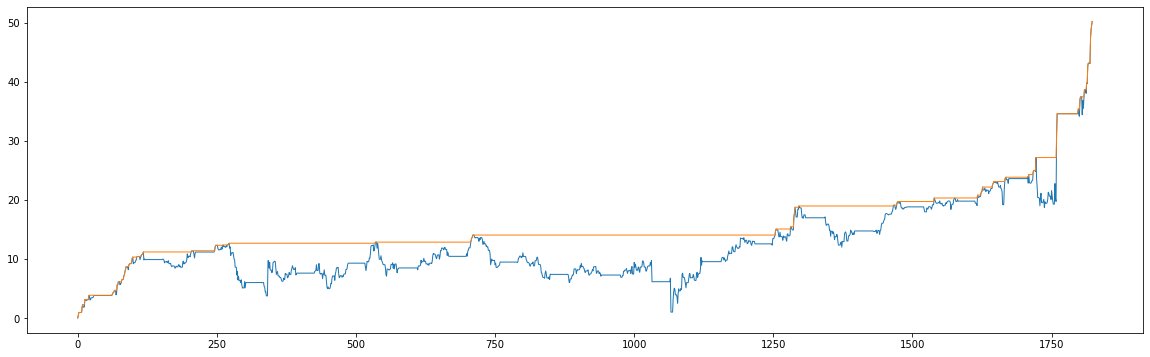

In [32]:
#Отладка проверка/визуализация работы функции np.maximum.accumulate
plt.rc("figure", figsize=(20, 6))

x = np.maximum.accumulate(df.iloc[:,3])

plt.plot(df.index, df.iloc[:,3], linewidth=1)
plt.plot(df.index, x, linewidth=1)

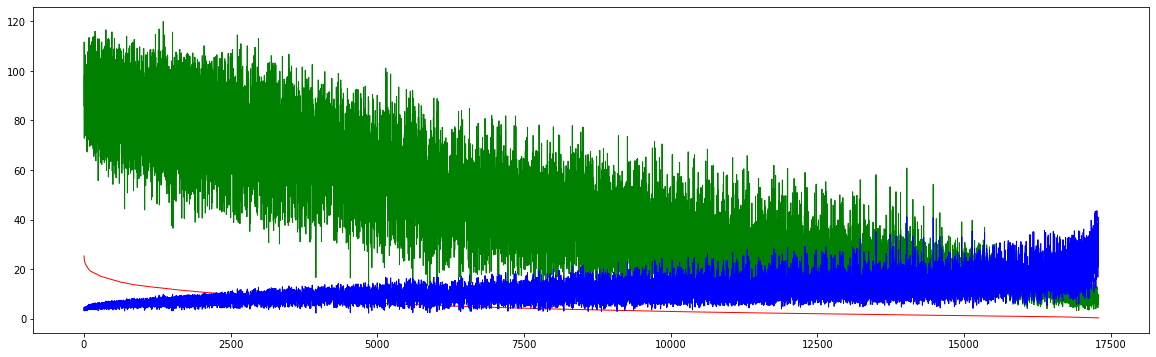

In [33]:
#  Расчет параметров стратегий 'DD' 'profit' 'prof/dd' 'num' 'prof/NUM' и сортировка 'prof/dd'
dd1 = np.maximum.accumulate(df)
dd1.tail()

dd2 = dd1 - df
dd3 = pd.DataFrame(dd2.max()) #Рассчитали максимальную просадку
dd3.columns = ['DD']

dd3['profit'] = dd1.max() #Рассчитали максимальный профит
dd3['prof/dd'] = dd3.profit/dd3.DD #Рассчитали соотношение максимальный профит/максимальная просадка

dd3['num'] = dd3.index
# ---ЭТО ПИЗДЕЦ ---- КОСТЫЛЬ ИЗ-ЗА ГЛЮКА ЛЕВЫЙ СТРОКИ ПРУТ ХЗ ОТКУДА   index_x	0.0	0.000000	NaN	x_x
# my_filter = [len(x)>15 for x in dd3.index]
# dd3 = dd3.iloc[my_filter,:]
# ---ЭТО ПИЗДЕЦ ---- КОСТЫЛЬ ИЗ-ЗА ГЛЮКА ЛЕВЫЙ СТРОКИ ПРУТ ХЗ ОТКУДА    index_x	0.0	0.000000	NaN	x_x

dd3['num'] = dd3['num'].apply(lambda x: float(x.split(':')[-1].split('=')[-1])) 
# dd3['num'] = dd3['num'].apply(lambda x: str(x.split(':')[-1][4:])) 
dd3['prof/NUM'] = dd3['profit']/dd3['num']

dd3.to_csv('dd3_no_sort.csv', sep=';')
dd3.sort_values(by = ['prof/dd'],ascending=False, inplace=True) # Сортировка по максимальной просадке !

plt.rc("figure", figsize=(20, 6))

plt.plot(range(len(dd3['prof/dd'])), dd3['prof/dd'], linewidth=1, color='r')
plt.plot(range(len(dd3['prof/dd'])), dd3['profit'], linewidth=1, color='g')
plt.plot(range(len(dd3['prof/dd'])), dd3['DD'], linewidth=1, color='b')

plt.show()

In [34]:
del(dd1,dd2)

In [35]:
# Сохраним параметры стратегий 'DD' 'profit' 'prof/dd' 'num' 'prof/NUM' в файл
dd3.to_csv('dd3.csv', sep=';')
dd3.head(30)

,DD,profit,prof/dd,num,prof/NUM
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.40:KAMA_PER=4:candle_per=40:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=1.20:ema_micro=5:NUM=731,3.399996,85.971858,25.285872,731.0,0.117609
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=60:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.50:ema_micro=5:NUM=1012,3.532386,86.473473,24.480187,1012.0,0.085448
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=5:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=1.30:ema_micro=5:NUM=926,4.584535,111.693870,24.363182,926.0,0.120620
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.40:KAMA_PER=4:candle_per=40:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=1.30:ema_micro=5:NUM=721,4.016344,95.947681,23.889309,721.0,0.133076
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=60:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.30:ema_micro=5:NUM=976,3.052595,72.806146,23.850578,976.0,0.074596
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=60:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.50:ema_micro=5:NUM=940,3.635159,85.003390,23.383678,940.0,0.090429
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=4:candle_per=60:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=5:NUM=895,4.223365,98.392323,23.297137,895.0,0.109936
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=60:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.50:ema_micro=5:NUM=922,3.475241,80.734575,23.231359,922.0,0.087565
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=60:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.60:ema_micro=5:NUM=958,3.767788,87.358021,23.185495,958.0,0.091188
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=60:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.60:ema_micro=5:NUM=819,3.911499,89.996172,23.008104,819.0,0.109885


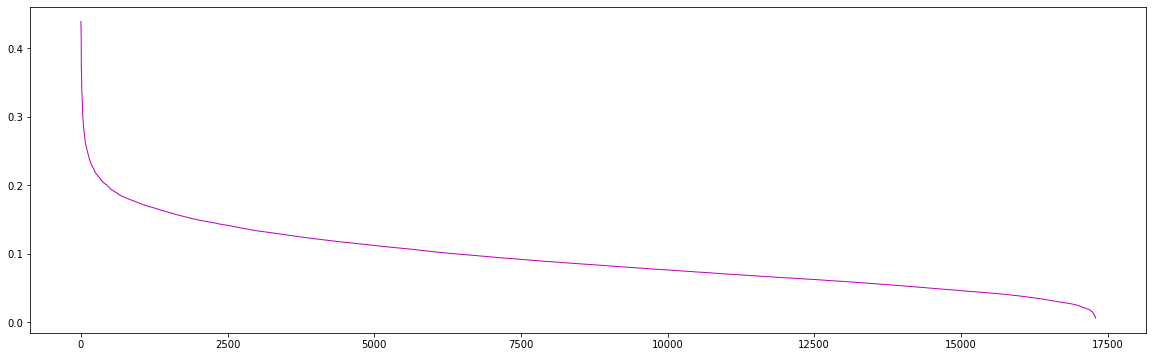

In [36]:
# Сортировка и график по 'prof/NUM'
dd3.sort_values(by = ['prof/NUM'],ascending=False, inplace=True)

plt.rc("figure", figsize=(20, 6))
plt.plot(range(len(dd3['prof/dd'])), dd3['prof/NUM'], linewidth=1, color='m')
plt.show()

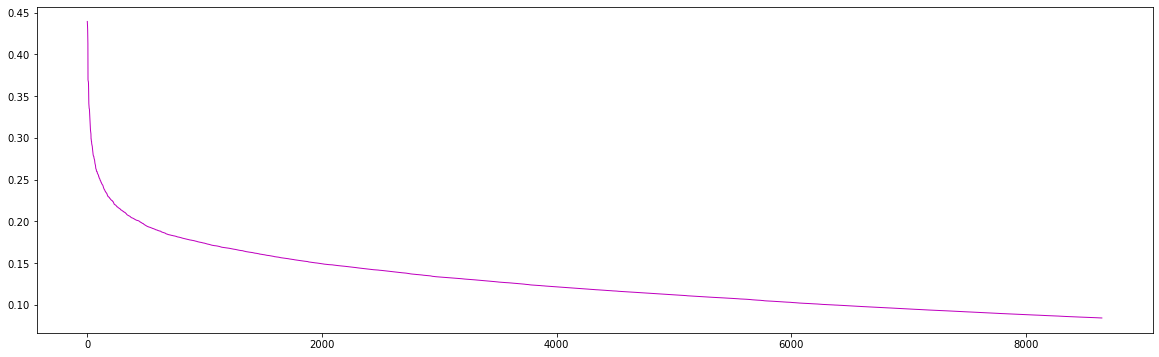

In [37]:
# отберем % лучших по параметру 'prof/NUM'

dd4 = dd3.iloc[0:round((len(dd3['prof/dd']))*prof_num_perc_param),:] 
dd4.head()

plt.rc("figure", figsize=(20, 6))
plt.plot(range(len(dd4['prof/dd'])), dd4['prof/NUM'], linewidth=1, color='m')
plt.show()

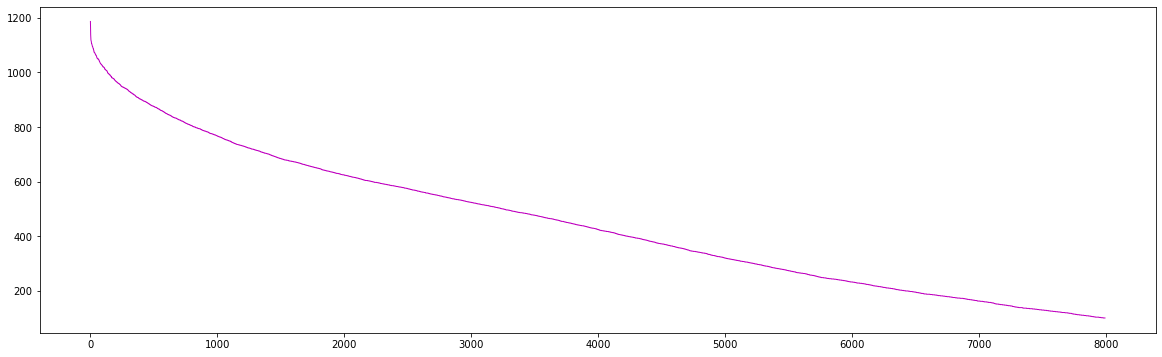

In [38]:
# уберем случайные варианты с минимальным количеством сделок. Отсекаем все что меньше num_min_param

dd4 = dd4.loc[dd4['num'] >= num_min_param]

dd4.sort_values(by = ['num'],ascending=False, inplace=True) #Отсортируем по 'num'

plt.rc("figure", figsize=(20, 6))
plt.plot(range(len(dd4['prof/dd'])), dd4['num'], linewidth=1, color='m')
plt.show()

In [39]:
#отберем % лучших по параметру 'prof/dd'
dd4.sort_values(by = ['prof/dd'],ascending=False, inplace=True) #Отсортируем по 'prof/dd'

dd5 = dd4.iloc[0:round((len(dd4['prof/dd']))*prof_dd_perc_param),:] 

In [40]:
#отберем % лучших по параметру 'profit'
dd5.sort_values(by = ['profit'],ascending=False, inplace=True) #Отсортируем по 'profit'

dd5 = dd5.iloc[0:round((len(dd5['profit']))*prof_perc_param),:] 

dd5.to_csv('dd5.csv', sep=';')

# dd5.tail()
dd5.head(30)
# dd5

,DD,profit,prof/dd,num,prof/NUM
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=4:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.70:K_EXT=1.20:ema_micro=5:NUM=803,9.810906,119.986660,12.229927,803.0,0.149423
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=4:candle_per=50:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=0.70:K_EXT=1.20:ema_micro=5:NUM=782,9.398431,116.921900,12.440577,782.0,0.149516
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=4:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=1.20:ema_micro=5:NUM=855,7.080164,116.594871,16.467820,855.0,0.136368
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=4:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=1.10:ema_micro=5:NUM=791,6.357450,116.041687,18.252867,791.0,0.146703
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.30:KAMA_PER=5:candle_per=80:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=0.90:ema_micro=5:NUM=620,7.350310,115.770618,15.750441,620.0,0.186727
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=4:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=1.10:ema_micro=5:NUM=935,9.770878,115.673207,11.838569,935.0,0.123715
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=5:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.70:K_EXT=1.10:ema_micro=5:NUM=842,9.107381,114.721543,12.596546,842.0,0.136249
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=4:candle_per=50:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.70:K_EXT=1.20:ema_micro=5:NUM=811,9.405416,114.559961,12.180212,811.0,0.141258
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=4:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.70:K_EXT=1.30:ema_micro=5:NUM=724,12.015628,114.547115,9.533178,724.0,0.158214
direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.20:KAMA_PER=5:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.70:K_EXT=1.20:ema_micro=5:NUM=777,7.999300,114.084311,14.261787,777.0,0.146827


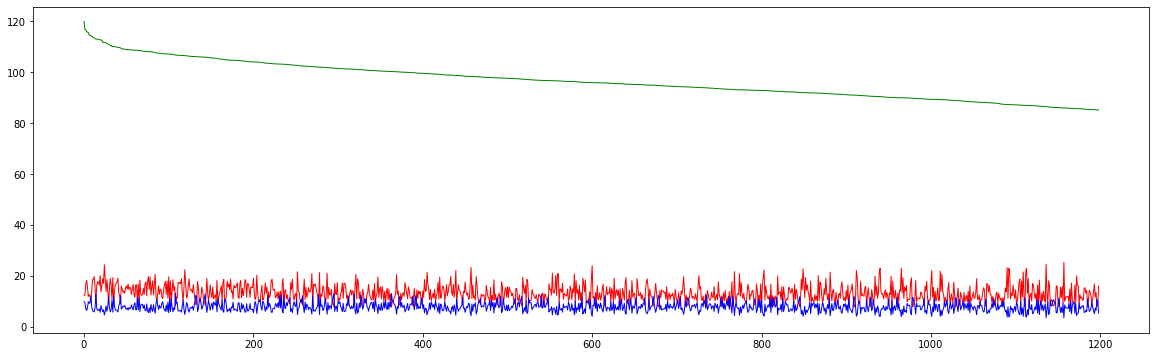

In [41]:
plt.rc("figure", figsize=(20, 6))

plt.plot(range(len(dd5['prof/dd'])), dd5['prof/dd'], linewidth=1, color='r')
plt.plot(range(len(dd5['prof/dd'])), dd5['profit'], linewidth=1, color='g')
plt.plot(range(len(dd5['prof/dd'])), dd5['DD'], linewidth=1, color='b')
# plt.plot(df.index, x, linewidth=1)
plt.show()

In [20]:
del(dd3,dd4)

NameError: name 'dd3' is not defined

In [21]:
#Теперь по отобранным индексам нужно восстановить таблицу с профитами df и только по индексам, для дальнейшего анализа.
dd6 = df.loc[:,dd5.index]
dd6.tail()

,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=60:NUM=815,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=60:NUM=860,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=65:NUM=814,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=65:NUM=857,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.2:KAMA_PER=10:candle_per=40:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.8:K_EXT=1.0:ema_micro=5:NUM=808,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=35:NUM=866,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.15:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=65:NUM=1079,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.2:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.6:K_EXT=0.8:ema_micro=35:NUM=927,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.15:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=60:NUM=1082,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=35:NUM=818,...,direction=0:stop_hour=180:filtration=2:shift_filtr=0:enter_exit=2:TR_LVL=0.1:KAMA_PER=10:candle_per=60:donch_per=10:f_macd1=6:f_macd2=16:K_ENT=0.6:K_EXT=0.4:ema_micro=20:NUM=554,direction=0:stop_hour=180:filtration=2:shift_filtr=0:enter_exit=2:TR_LVL=0.1:KAMA_PER=10:candle_per=50:donch_per=10:f_macd1=12:f_macd2=20:K_ENT=0.8:K_EXT=0.6:ema_micro=30:NUM=702,direction=0:stop_hour=180:filtration=2:shift_filtr=0:enter_exit=2:TR_LVL=0.1:KAMA_PER=10:candle_per=70:donch_per=10:f_macd1=14:f_macd2=16:K_ENT=0.8:K_EXT=0.6:ema_micro=10:NUM=503,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.4:KAMA_PER=8:candle_per=50:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=1.0:ema_micro=5:NUM=348,direction=0:stop_hour=180:filtration=2:shift_filtr=0:enter_exit=2:TR_LVL=0.1:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.7:K_EXT=0.4:ema_micro=25:NUM=572,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.3:KAMA_PER=6:candle_per=40:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.9:K_EXT=0.8:ema_micro=5:NUM=715,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.25:KAMA_PER=8:candle_per=60:donch_per=50:f_macd1=10:f_macd2=20:K_ENT=0.70:K_EXT=0.50:ema_micro=5:NUM=705,direction=0:stop_hour=180:filtration=2:shift_filtr=0:enter_exit=2:TR_LVL=0.1:KAMA_PER=10:candle_per=80:donch_per=10:f_macd1=6:f_macd2=20:K_ENT=0.5:K_EXT=0.2:ema_micro=50:NUM=794,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.25:KAMA_PER=10:candle_per=40:donch_per=90:f_macd1=10:f_macd2=20:K_ENT=0.90:K_EXT=0.90:ema_micro=5:NUM=539,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=0:TR_LVL=0.3:KAMA_PER=6:candle_per=80:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.6:K_EXT=0.3:ema_micro=5:NUM=708
1819,118.057418,117.229269,117.555173,116.543022,117.904437,115.477476,116.889059,115.424456,116.903632,115.356767,...,60.610069,60.309870,59.471012,59.825174,60.093540,60.512784,62.763955,60.777016,61.883231,60.567401
1820,114.974684,114.210189,114.472439,113.523942,113.915745,112.511766,112.018835,112.395091,112.033408,112.327402,...,58.687775,58.330977,58.492891,61.017088,59.098747,57.571084,60.612

In [22]:
del(df)

In [23]:
corr = dd6.corr(method ='pearson') #Рассчитаем корреляцию
corr = corr.sort_values(by=corr.index[0], axis=1)
corr = corr.sort_values(by=corr.columns[0])

corr.head(20)

,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.15:KAMA_PER=10:candle_per=50:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=1.30:ema_micro=5:NUM=664,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=10:candle_per=80:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.9:ema_micro=5:NUM=750,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.2:KAMA_PER=6:candle_per=50:donch_per=50:f_macd1=10:f_macd2=20:K_ENT=0.6:K_EXT=1.2:ema_micro=5:NUM=707,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.25:KAMA_PER=6:candle_per=80:donch_per=50:f_macd1=10:f_macd2=20:K_ENT=0.40:K_EXT=1.20:ema_micro=5:NUM=463,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=10:candle_per=80:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=1.0:ema_micro=5:NUM=678,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.15:KAMA_PER=10:candle_per=70:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=1.40:ema_micro=5:NUM=423,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=10:candle_per=60:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=0.5:K_EXT=1.0:ema_micro=5:NUM=813,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.1:KAMA_PER=10:candle_per=80:donch_per=50:f_macd1=10:f_macd2=20:K_ENT=0.4:K_EXT=0.8:ema_micro=5:NUM=770,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.2:KAMA_PER=10:candle_per=50:donch_per=50:f_macd1=10:f_macd2=20:K_ENT=0.5:K_EXT=1.2:ema_micro=5:NUM=574,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.2:KAMA_PER=6:candle_per=50:donch_per=50:f_macd1=10:f_macd2=20:K_ENT=0.6:K_EXT=1.1:ema_micro=5:NUM=773,...,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=20:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.90:ema_micro=5:NUM=765,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=35:NUM=818,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=50:NUM=817,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=40:NUM=817,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=45:NUM=817,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=40:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=5:NUM=787,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=1:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=30:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=5:NUM=806,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=55:NUM=816,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=65:NUM=814,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.60:K_EXT=0.80:ema_micro=60:NUM=815
direction=0:stop_hour=180:filtration=2:shift_filtr=0:enter_exit=2:TR_LVL=0.1:KAMA_PER=10:candle_per=70:donch_per=10:f_macd1=14:f_macd2=16:K_ENT=0.6:K_EXT=0.6:ema_micro=15:NUM=836,0.756233,0.786361,0.832793,0.778941,0.815958,0.802884,0.837783,0.818000,0.813619,0.859935,...,0.957232,0.963671,0.964980,0.963310,0.962223,0.953854,0.952522,0.963221,0.956220,0.957084
direction=0:stop_hour=180:filtration=2:

In [70]:
# # !!! Используем следующую она точнее и точечнее А тут просто обобщенная !
# # новая метода анализа по корреляции, через разницу кривой доходности с ЕМА.
# # Т.к. у всех тренд вверх, то корреляция сичтается хуже, поэтому "линеаризуем стратегии и их сравниваем"

# ema_per =10
# dd6.tail(5)
# # curr_m['ema']   = curr_m['close'].ewm(span=ema_per, adjust=False).mean()
# dd7 = dd6.ewm(span=ema_per, adjust=False).mean()
# dd8 = dd6 - dd7
# dd8
# corr2 = dd8.corr(method ='pearson') #Рассчитаем корреляцию
# corr2 = corr2.sort_values(by=corr2.index[0], axis=1)
# corr2 = corr2.sort_values(by=corr2.columns[0])

# corr2.head(20)

In [24]:
# новая метода анализа по корреляции, через разницу кривой доходности с ЕМА.
# Т.к. у всех тренд вверх, то корреляция сичтается хуже, поэтому "линеаризуем стратегии и их сравниваем"
# Но сравниваем мы только с самой топовой стратой по proff/dd

ema_per =10
dd6.tail(5)

dd7 = dd6.ewm(span=ema_per, adjust=False).mean()
dd8 = dd6 - dd7
dd8
corr2 = dd8.corr(method ='pearson') #Рассчитаем корреляцию



In [26]:
del(dd6,dd7,dd8)

In [35]:
# Продолжение для ускорения вычислений
# Автоматический топ из dd5
# top_strategy = dd5.index[0]
# Вручную задаем
top_strategy = 'direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=25:NUM=867'


corr_to_top = corr2[top_strategy]
corr_to_top = pd.DataFrame({'index':corr_to_top.index, 'corr':corr_to_top.values})
ddd5 = dd5.reset_index()
dddd5 = pd.merge(ddd5,corr_to_top, how='outer', on='index') # 
dddd5.sort_values(by = ['corr'],ascending=True, inplace=True) #Отсортируем по 'corr'
dddd5.rename(columns={'index': top_strategy }, inplace=True)
dddd5.to_csv('corr_top.csv', sep=';')

dddd5.head(20)

,direction=0:stop_hour=180:filtration=3:shift_filtr=0:enter_exit=2:TR_LVL=0.25:KAMA_PER=6:candle_per=60:donch_per=10:f_macd1=10:f_macd2=20:K_ENT=0.50:K_EXT=0.80:ema_micro=25:NUM=867,DD,profit,prof/dd,num,prof/NUM,corr
22712,direction=0:stop_hour=180:filtration=3:shift_f...,7.949792,65.805802,8.277676,486.0,0.135403,0.260779
22478,direction=0:stop_hour=180:filtration=3:shift_f...,7.675078,66.107535,8.613272,526.0,0.125680,0.266162
21105,direction=0:stop_hour=180:filtration=3:shift_f...,6.600174,67.905019,10.288368,593.0,0.114511,0.272858
22230,direction=0:stop_hour=180:filtration=3:shift_f...,7.278925,66.412993,9.124011,558.0,0.119020,0.292813
22414,direction=0:stop_hour=180:filtration=3:shift_f...,6.914669,66.186912,9.571956,499.0,0.132639,0.296220
20904,direction=0:stop_hour=180:filtration=3:shift_f...,6.732802,68.170237,10.125091,520.0,0.131097,0.296404
20633,direction=0:stop_hour=180:filtration=2:shift_f...,8.058510,68.554901,8.507144,596.0,0.115025,0.297483
22988,direction=0:stop_hour=180:filtration=3:shift_f...,7.303086,65.436598,8.960130,331.0,0.197694,0.298791
19508,direction=0:stop_hour=180:filtration=3:shift_f...,7.797947,70.162661,8.997581,862.0,0.081395,0.300205
22694,direction=0:stop_hour=180:filtration=2:shift_f...,7.964051,65.827760,8.265612,473.0,0.139171,0.300278


In [32]:
# save data corr
corr2.to_csv('corr2.csv', sep=';')
dd5.to_csv('dd5.csv', sep=';')


In [ ]:
# ------------------ КОРРЕЛЯЦИЯ ВСЕХ С ТОПОВОЙ СТРАТОЙ-------------------------------------
# !!!!!!!!!!!!!!!!!!!!!!!!!! НАДО СДЕЛАТЬ !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# сортировку ввести и т.д.

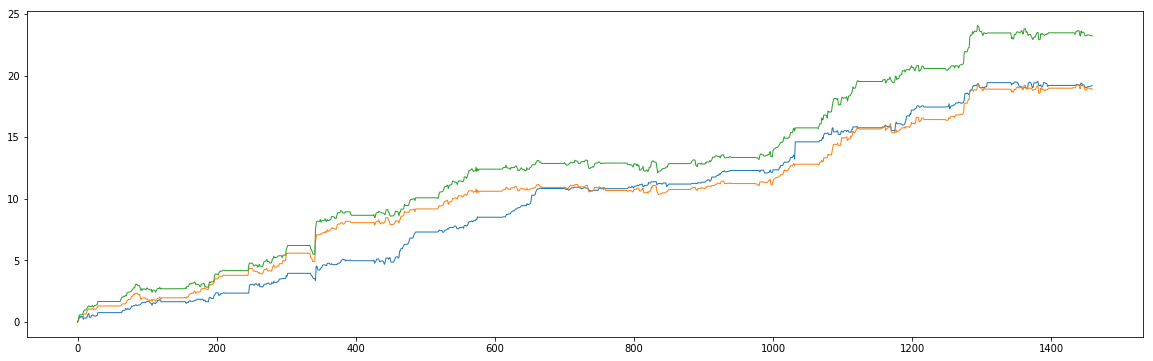

In [27]:
# dd6.loc[:,dd5.index]
dd9 = dd6.loc[:,[
#                  'candle_per=50:kama_per=6:k_atr=0.05:ENT=1.20:NUM=213'
#                 ,'candle_per=40:kama_per=11:k_atr=0.14:ENT=1.00:NUM=324'
    
#                 ,'candle_per=40:kama_per=7:k_atr=0.11:ENT=1.40:NUM=184'
#                 ,'candle_per=40:kama_per=10:k_atr=0.05:ENT=1.00:NUM=342'
    
                'KAMA_PER=9:TR_LVL=0.5:Shift_Filtr=0.0:T_ENT=1.4:T_EXT=1.2:F_ENT=100.0:F_EXT=1.2:NUM=139' # top little corr
#                ,'KAMA_PER=9:TR_LVL=0.5:Shift_Filtr=0.0:T_ENT=1.1:T_EXT=1.1:F_ENT=100.0:F_EXT=1.1:NUM=261' # little corr
#                ,'KAMA_PER=10:TR_LVL=0.6:Shift_Filtr=0.0:T_ENT=0.9:T_EXT=1.3:F_ENT=100.0:F_EXT=1.3:NUM=192' # little corr
    
    ,'KAMA_PER=7:TR_LVL=0.6:Shift_Filtr=0.0:T_ENT=1.0:T_EXT=0.6:F_ENT=100.0:F_EXT=0.6:NUM=242'
    ,'KAMA_PER=7:TR_LVL=0.6:Shift_Filtr=0.0:T_ENT=0.8:T_EXT=0.7:F_ENT=100.0:F_EXT=0.7:NUM=333'
#     ,'KAMA_PER=10:TR_LVL=0.5:Shift_Filtr=0.0:T_ENT=1.3:T_EXT=1.5:F_ENT=100.0:F_EXT=1.5:NUM=112'
#     ,'KAMA_PER=10:TR_LVL=0.4:Shift_Filtr=0.0:T_ENT=1.2:T_EXT=0.4:F_ENT=100.0:F_EXT=0.4:NUM=232'
#     ,'KAMA_PER=9:TR_LVL=0.5:Shift_Filtr=0.0:T_ENT=1.1:T_EXT=0.3:F_ENT=100.0:F_EXT=0.3:NUM=200'
#     ,'KAMA_PER=7:TR_LVL=0.5:Shift_Filtr=0.0:T_ENT=1.0:T_EXT=0.8:F_ENT=100.0:F_EXT=0.8:NUM=243'
    
#     ,'KAMA_PER=7:TR_LVL=0.5:Shift_Filtr=0.0:T_ENT=1.1:T_EXT=0.8:F_ENT=100.0:F_EXT=0.8:NUM=203'
#     ,'KAMA_PER=10:TR_LVL=0.4:Shift_Filtr=0.0:T_ENT=1.2:T_EXT=0.4:F_ENT=100.0:F_EXT=0.4:NUM=232'
#     ,'KAMA_PER=10:TR_LVL=0.6:Shift_Filtr=1.0:T_ENT=1.1:T_EXT=0.4:F_ENT=100.0:F_EXT=0.4:NUM=222'
#     ,'KAMA_PER=7:TR_LVL=0.5:Shift_Filtr=0.0:T_ENT=1.1:T_EXT=0.5:F_ENT=100.0:F_EXT=0.5:NUM=209'

#                 ,'candle_per=60:kama_per=9:k_atr=0.13:ENT=0.20:NUM=635'  # top prof/DD
    

                ]]
# dd9.shape[1]

# 	6.192755	69.074989	11.154162	1286.0	0.053713
# 	5.944598	66.096983	11.118831	635.0	0.104090
# 	5.6


# Отобразим на графике доходности
plt.rc("figure", figsize=(20, 6))

for i in range(dd9.shape[1]):
    plt.plot(dd9.index, dd9.iloc[:,i], linewidth=1) 
    
# plt.plot(dd9.index, dd9.median(axis=1), linewidth=3) # Среднее значение всех столбцов

In [ ]:
#===============================================НИЖЕ ОТЛАДКА=========================================================

In [ ]:
tst
# tst.iloc[0,0] = stop_date
# Хитрожопая конструкция
tst.loc[0, 'timestamp'] = stop_date
tst = tst.fillna(0)
tst

In [49]:

# ddf = df_final[['timestamp']]
ddf = quotes[0][['timestamp']].resample('1D',on='timestamp').last()
ddf.drop(['timestamp'], axis=1, inplace=True)
ddf.reset_index(inplace=True) #Сброс индексов и timestamp уже не будет индексом  
# ddf.drop(['close'], axis=1, inplace=True)
ddf

df_all_midd = ddf[['timestamp']]
df_all_midd

,timestamp
0,2017-05-02
1,2017-05-03
2,2017-05-04
3,2017-05-05
4,2017-05-06
...,...
1346,2021-01-07
1347,2021-01-08
1348,2021-01-09
1349,2021-01-10


In [19]:
# Инициализация исходных переменных для оптимизации
# Параметры трендового индикатора
EMA1_Trend = 20;    EMA1_Trend_Start = 20;     EMA1_Trend_Step = 1 ;    EMA1_Trend_Stop = 30
EMA2_Trend = 30;    EMA2_Trend_Start = 30;     EMA2_Trend_Step = 5 ;    EMA2_Trend_Stop = 100
EMA_MACD_Trend = 3; EMA_MACD_Trend_Start = 3;  EMA_MACD_Trend_Step = 1 ;EMA_MACD_Trend_Stop = 10

# Параметры осциллятора
EMA1_Osc = 1;  EMA1_Osc_Start = 1;  EMA1_Osc_Step = 1 ;EMA1_Osc_Stop = 3
EMA2_Osc = 3;  EMA2_Osc_Start = 3;  EMA2_Osc_Step = 1 ;EMA2_Osc_Stop = 5
EMA_MACD_Osc = 5;  EMA_MACD_Osc_Start = 5;  EMA_MACD_Osc_Step = 1 ;EMA_MACD_Osc_Stop = 10

# Параметры коэффициэнтов
T_ENT = 1.1;   T_ENT_Start = 0.4;   T_ENT_Step = 0.1;   T_ENT_Stop = 1.5
T_EXT = 0.5;   T_EXT_Start = 0.3;   T_EXT_Step = 0.1;   T_EXT_Stop = 1.0
# F_ENT = 100;   F_ENT_Start = 0.8;   F_ENT_Step = 0.1;   F_ENT_Stop = 1.4
F_ENT = 100;   F_ENT_Start = 100;   F_ENT_Step = 0.1;   F_ENT_Stop = 100
F_EXT = 0.5;   F_EXT_Start = 0.2;   F_EXT_Step = 0.1;   F_EXT_Stop = 1.0
#Ориентировочный рассчет времени выполнения

KAMA_PER = 10
TR_LVL = 0.6;  TR_LVL_Start = 0.3;  TR_LVL_Step = 0.1;  TR_LVL_Stop = 0.8;



Num_CYCLES = ((TR_LVL_Stop - TR_LVL_Start+TR_LVL_Step)/TR_LVL_Step)*((T_ENT_Stop - T_ENT_Start+T_ENT_Step)/T_ENT_Step)*((T_EXT_Stop - T_EXT_Start+T_EXT_Step)/T_EXT_Step)*((F_ENT_Stop - F_ENT_Start+F_ENT_Step)/F_ENT_Step)*((F_EXT_Stop - F_EXT_Start+F_EXT_Step)/F_EXT_Step)

print(" CYCLES = ",Num_CYCLES," TIME = ",Num_CYCLES*1.89," сек.", Num_CYCLES*1.89/60,"мин.")

 CYCLES =  5183.999999999999  TIME =  9797.759999999998  сек. 163.29599999999996 мин.


In [20]:
#Рассчет среднего значения текущего % прибыли для всех активов
def count_multy(df_final, EMA1_Trend, EMA2_Trend, EMA_MACD_Trend, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT):
    percent = df_final[['timestamp']]
    num = 0
    for i in range(1, df_final.shape[1]):
#         xx = elder_macd_profit(df_final.iloc[:,[0,i]],EMA1_Trend, EMA2_Trend, EMA_MACD_Trend, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT)
        xx = elder_kama_profit(df_final.iloc[:,[0,i]],2, KAMA_PER, TR_LVL, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT)

        percent['s %i'%i] = xx
        #также тут нужно сосчитать средне количество строк(переменных кроме NAN) во всех столбцах 
        num += round(len(xx)/2)    
    num = num/(df_final.shape[1]-1)     #Среднее количество сделок

    #заполним 
    percent = percent.fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
    percent = percent.fillna(0) # А все что сначала не заполнилось заливаем нулями
#     percent
    #Теперь посчитаем среднее значение и занесем в дата фрайм
    # percent[].mean(axis=1)
    # percent.iloc[:,1:].mean(axis=1)
#     dddf = percent[['timestamp']]
#     dddf.loc[:,'T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:NUM=%i' % (T_ENT,T_EXT,F_ENT,F_EXT,num)] = percent.iloc[:,1:].mean(axis=1) 
#     return(dddf.iloc[:,1])
    return(percent, num)

In [21]:
# Здесь сделаем суперцикл оптимизации

ftime = time.time() #Засекаем время

# ddf = df #инициализация датафрейма с правильной временной распальцовкой индекса
ddf = df_final[['timestamp']]

# for  i in [x/10 for x in range(10, 31, 1)]:  # Генератор списка вложенный в цикл for для исполнения #     print(i)

T_ENT = T_ENT_Start 
while T_ENT <= T_ENT_Stop:
    T_EXT = T_EXT_Start
    while T_EXT <= T_EXT_Stop:
#         F_ENT = F_ENT_Start 
#         while F_ENT <= F_ENT_Stop:
        TR_LVL = TR_LVL_Start 
        while TR_LVL <= TR_LVL_Stop:
            F_EXT = F_EXT_Start
            while F_EXT <= F_EXT_Stop:
    #             data = elder_macd_profit(df,EMA1_Trend, EMA2_Trend, EMA_MACD_Trend, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT)
    #             ddf.loc[:,'T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:NUM=%i' % (T_ENT,T_EXT,F_ENT,F_EXT,round(len(data)/2))] = data
                resault = count_multy(df_final, EMA1_Trend, EMA2_Trend, EMA_MACD_Trend, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT)
                percent = resault[0]
                num = resault[1]
                ddf.loc[:,'TR_LVL=%.1f:T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:NUM=%i' % (TR_LVL,T_ENT,T_EXT,F_ENT,F_EXT,num)] = percent.iloc[:,1:].mean(axis=1) 
                F_EXT = F_EXT + F_EXT_Step  
            TR_LVL = TR_LVL + TR_LVL_Step
#             F_ENT = F_ENT + F_ENT_Step
        T_EXT = T_EXT + T_EXT_Step
    T_ENT = T_ENT + T_ENT_Step
    
endtime = time.time() - ftime

ddf = ddf.fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
ddf = ddf.fillna(0) # А все что сначала не заполнилось заливаем нулями

print("Время цикла=",endtime,"секунд")    
ddf.tail()


Время цикла= 10048.906139850616 секунд


,timestamp,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.2:NUM=1312,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.3:NUM=1288,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.4:NUM=1258,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.5:NUM=1233,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.6:NUM=1208,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.7:NUM=1182,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.8:NUM=1159,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.9:NUM=1140,TR_LVL=0.3:T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=1.0:NUM=1121,...,TR_LVL=0.7:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=1.0:NUM=160,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.2:NUM=89,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.3:NUM=89,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.4:NUM=89,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.5:NUM=89,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.6:NUM=89,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.7:NUM=89,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.8:NUM=89,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=0.9:NUM=88,TR_LVL=0.8:T_ENT=1.4:T_EXT=1.0:F_ENT=100.0:F_EXT=1.0:NUM=88
11782,2019-05-06 19:00:00,53.187316,56.412093,59.082077,57.154375,55.946876,52.548758,53.612415,56.118084,57.914558,...,20.935392,13.78471,14.58581,14.615164,13.859058,14.893193,14.1938,13.482336,14.031528,14.288456
11783,2019-05-06 20:00:00,53.155141,56.379918,59.049902,57.122200,55.946876,52.548758,53.612415,56.118084,57.914558,...,20.935392,13.78471,14.58581,14.615164,13.859058,14.893193,14.1938,13.482336,14.031528,14.288456
11784,2019-05-06 21:00:00,52.889293,56.114071,58.959121,57.031419,55.856095,52.457977,53.521634,56.027303,57.823777,...,20.935392,13.78471,14.58581,14.615164,13.859058,14.893193,14.1938,13.482336,14.031528,14.288456
11785,2019-05-06 22:00:00,52.855781,56.114071,58.959121,57.031419,55.856095,52.457977,53.521634,55.992801,57.789276,...,20.935392,13.78471,14.58581,14.615164,13.859058,14.893193,14.1938,13.482336,14.031528,14.288456
11786,2019-05-06 23:00:00,52.642162,55.959880,58.774281,56.682692,55.459608,52.061490,53.125147,55.596314,57.392789,...,20.935392,13.78471,14.58581,14.615164,13.859058,14.893193,14.1938,13.482336,14.031528,14.288456


In [22]:
ddf.to_csv('joepa_multy_kama_shift_2.csv', sep=';')

In [10]:
ddf.tail()

,timestamp,close,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.2:NUM=1151,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.3:NUM=1146,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.4:NUM=1138,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.5:NUM=1134,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.6:NUM=1131,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.7:NUM=1128,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.8:NUM=1123,T_ENT=0.4:T_EXT=0.3:F_ENT=100.0:F_EXT=0.9:NUM=1116,...,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=0.5:NUM=336,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=0.6:NUM=336,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=0.7:NUM=334,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=0.8:NUM=331,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=0.9:NUM=328,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=1.0:NUM=326,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=1.1:NUM=322,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=1.2:NUM=317,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=1.3:NUM=314,T_ENT=1.4:T_EXT=1.4:F_ENT=100.0:F_EXT=1.4:NUM=308
13401,2019-10-23 19:00:00,64322.0,23.380022,23.376909,23.542279,22.356668,19.992259,15.068375,12.302332,15.426826,...,33.886768,34.017509,32.678349,32.565266,31.753106,30.661526,30.157052,26.253992,38.481479,37.501037
13402,2019-10-23 20:00:00,64334.0,23.223275,23.220162,23.385532,22.199920,19.835512,14.911628,12.145585,15.270079,...,33.886768,34.017509,32.678349,32.565266,31.753106,30.661526,30.157052,26.253992,38.481479,37.501037
13403,2019-10-23 21:00:00,64364.0,23.223275,23.220162,23.385532,22.199920,19.835512,14.911628,12.145585,15.270079,...,33.886768,34.017509,32.678349,32.565266,31.753106,30.661526,30.157052,26.253992,38.481479,37.501037
13404,2019-10-23 22:00:00,64386.0,23.223275,23.220162,23.385532,22.199920,19.835512,14.911628,12.145585,15.270079,...,33.886768,34.017509,32.678349,32.565266,31.753106,30.661526,30.157052,26.253992,38.481479,37.501037
13405,2019-10-23 23:00:00,64422.0,23.223275,23.220162,23.385532,22.199920,19.835512,14.911628,12.145585,15.270079,...,33.886768,34.017509,32.678349,32.565266,31.753106,30.661526,30.157052,26.253992,38.481479,37.501037


In [138]:
# #Рассчет среднего значения для всех активов
# def count_multy(df_final, EMA1_Trend, EMA2_Trend, EMA_MACD_Trend, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT):
#     percent = df_final[['timestamp']]
#     num = 0
#     for i in range(1, df_final.shape[1]):
#         xx = elder_macd_profit(df_final.iloc[:,[0,i]],EMA1_Trend, EMA2_Trend, EMA_MACD_Trend, EMA1_Osc, EMA2_Osc, EMA_MACD_Osc, T_ENT, T_EXT, F_ENT, F_EXT)
#         percent['s %i'%i] = xx
#         #также тут нужно сосчитать средне количество строк(переменных кроме NAN) во всех столбцах 
#         num += round(len(xx)/2)    
#     num = num/(df_final.shape[1]-1)     #Среднее количество сделок

#     #заполним 
#     percent = percent.fillna(method='ffill') # Заполняем дыры предыдущим действительным значением
#     percent = percent.fillna(0) # А все что сначала не заполнилось заливаем нулями
# #     percent
#     #Теперь посчитаем среднее значение и занесем в дата фрайм
#     # percent[].mean(axis=1)
#     # percent.iloc[:,1:].mean(axis=1)
# #     dddf = percent[['timestamp']]
# #     dddf.loc[:,'T_ENT=%.1f:T_EXT=%.1f:F_ENT=%.1f:F_EXT=%.1f:NUM=%i' % (T_ENT,T_EXT,F_ENT,F_EXT,num)] = percent.iloc[:,1:].mean(axis=1) 
# #     return(dddf.iloc[:,1])
#     return(percent)